<a href="https://colab.research.google.com/github/vecha2468/CMPE_255_GROUP_11/blob/main/DataMining_Project_Group_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()


In [2]:
!pip install pandas-gbq


In [3]:
!pip install sodapy
import pandas as pd
from sodapy import Socrata

In [14]:
import os
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sodapy import Socrata
warnings.filterwarnings('ignore')

In [15]:
domain = "data.cdc.gov"
client = Socrata(domain, None)


In [16]:
# Dataset 1
dis1_dataset_identifier = '9dzk-mvmi'
dis1_results = client.get(dis1_dataset_identifier)
dis1_df = pd.DataFrame.from_dict(dis1_results)

# Dataset 2
dis2_dataset_identifier = '65mz-jvh5'
dis2_results = client.get(dis2_dataset_identifier)
dis2_df = pd.DataFrame.from_dict(dis2_results)

In [17]:
columns1 = ['data_as_of','start_date','end_date','flag_accid','flag_mva','flag_suic',
            'flag_homic','flag_drugod','natural_cause','accidents_unintentional']
dis1_df.drop(columns1, inplace=True, axis=1)
dis1_df.rename(columns={'jurisdiction_of_occurrence': 'State'}, inplace=True)

columns2 = ['analysisdate','date_of_death_month','start_date','end_date','race_ethnicity']
dis2_df.drop(columns2, inplace=True, axis=1)
dis2_df.rename(columns={'jurisdiction_of_occurrence': 'State'}, inplace=True)


In [18]:
merged_df = pd.concat([dis1_df, dis2_df])
merged_df.head()

,State,year,month,all_cause,septicemia,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,chronic_lower_respiratory,...,allcause,naturalcause,septicemia_a40_a41,malignant_neoplasms_c00_c97,diabetes_mellitus_e10_e14,alzheimer_disease_g30,influenza_and_pneumonia_j09,diseases_of_heart_i00_i09,covid_19_u071_multiple_cause,covid_19_u071_underlying
0,United States,2020,1,264681,3687,52635,8234,11122,6656,15533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,2020,2,244966,3324,48764,7766,10444,6147,14267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,2020,3,269806,3669,51640,8433,11385,7579,15284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,2020,4,322424,3366,48773,9440,12307,5781,13765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2020,5,280564,3085,49012,8361,10706,3612,12064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
merged_df.to_csv('processed_idss_data.csv', index=False)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('processed_idss_data.csv')
df.head()

,State,year,month,all_cause,septicemia,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,chronic_lower_respiratory,...,allcause,naturalcause,septicemia_a40_a41,malignant_neoplasms_c00_c97,diabetes_mellitus_e10_e14,alzheimer_disease_g30,influenza_and_pneumonia_j09,diseases_of_heart_i00_i09,covid_19_u071_multiple_cause,covid_19_u071_underlying
0,United States,2020.0,1.0,264681.0,3687.0,52635.0,8234.0,11122.0,6656.0,15533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,2020.0,2.0,244966.0,3324.0,48764.0,7766.0,10444.0,6147.0,14267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,2020.0,3.0,269806.0,3669.0,51640.0,8433.0,11385.0,7579.0,15284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,2020.0,4.0,322424.0,3366.0,48773.0,9440.0,12307.0,5781.0,13765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2020.0,5.0,280564.0,3085.0,49012.0,8361.0,10706.0,3612.0,12064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Select columns that exist in your dataset
X = df[['influenza_and_pneumonia', 'influenza_and_pneumonia_j09']].astype(float)
y = df['covid_19_u071_underlying'].astype(float)


In [23]:
# Fill missing numeric values with column mean
X = X.fillna(X.mean())
y = y.fillna(y.mean())


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Mean Squared Error: 1.6485366937740547e-06
R² Score: -39.00540628930249


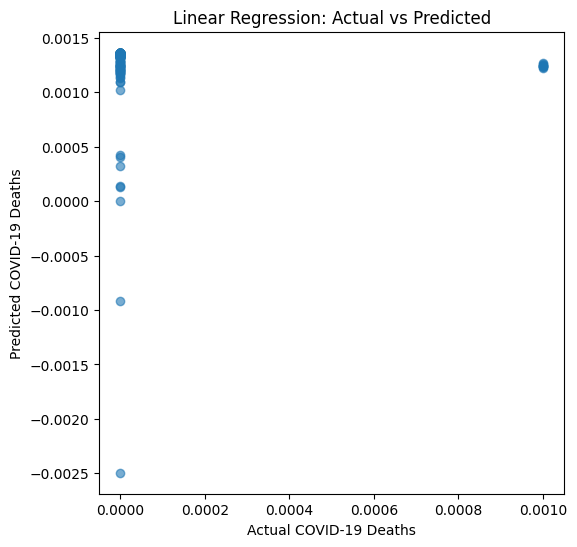

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual COVID-19 Deaths")
plt.ylabel("Predicted COVID-19 Deaths")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()